For this assignment, I examine the phishing website dataset available at the UCI Machine Learning Repository.
my aim is to predict whether websites are phishing or not on the bases of several attributes from the data set.

installing klib liberary

In [2]:
pip install klib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


loading liberaries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib
import seaborn as sns
import warnings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline

load data

In [5]:
phishing=pd.read_csv("https://raw.githubusercontent.com/shahin28jan/data/main/Phishing_Legitimate_full.csv")

Data Investigation    

checking first 5 rows of the data

In [6]:
phishing.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


columnes name before cleaning

In [7]:
phishing.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

Basic information

In [8]:
phishing.shape

(10000, 50)

There are 10000 rows and 50 columns

In [9]:
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [10]:
phishing.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observatio:
   1.The dataset contains 10000 rows and 50 columns
   2.There are no categorical features
   3.There are 47 numeric features and 3 float 

There is no null value and uniqu value

cleaning the data by klib liberary

In [12]:
phishing_clean = klib.data_cleaning(phishing)

Long column names detected (>25 characters). Consider renaming the following columns ['pct_null_self_redirect_hyperlinks', 'frequent_domain_name_mismatch', 'abnormal_ext_form_action_r', 'pct_ext_null_self_redirect_hyperlinks_rt'].
Shape of cleaned data: (10000, 49) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['https_in_hostname']
Dropped missing values: 0
Reduced memory by at least: 3.21 MB (-84.25%)



In [13]:
phishing_clean.head()

,id,num_dots,subdomain_level,path_level,url_length,num_dash,num_dash_in_hostname,at_symbol,tilde_symbol,num_underscore,...,iframe_or_frame,missing_title,images_only_in_form,subdomain_level_rt,url_length_rt,pct_ext_resource_urls_rt,abnormal_ext_form_action_r,ext_meta_script_link_rt,pct_ext_null_self_redirect_hyperlinks_rt,class_label
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [14]:
phishing_clean.columns

Index(['id', 'num_dots', 'subdomain_level', 'path_level', 'url_length',
       'num_dash', 'num_dash_in_hostname', 'at_symbol', 'tilde_symbol',
       'num_underscore', 'num_percent', 'num_query_components',
       'num_ampersand', 'num_hash', 'num_numeric_chars', 'no_https',
       'random_string', 'ip_address', 'domain_in_subdomains',
       'domain_in_paths', 'hostname_length', 'path_length', 'query_length',
       'double_slash_in_path', 'num_sensitive_words', 'embedded_brand_name',
       'pct_ext_hyperlinks', 'pct_ext_resource_urls', 'ext_favicon',
       'insecure_forms', 'relative_form_action', 'ext_form_action',
       'abnormal_form_action', 'pct_null_self_redirect_hyperlinks',
       'frequent_domain_name_mismatch', 'fake_link_in_status_bar',
       'right_click_disabled', 'pop_up_window', 'submit_info_to_email',
       'iframe_or_frame', 'missing_title', 'images_only_in_form',
       'subdomain_level_rt', 'url_length_rt', 'pct_ext_resource_urls_rt',
       'abnormal_ext_for

Expolatary Data Analysis(EDA)

In [84]:
phishing_clean['pop_up_window'].head()

0    0
1    0
2    0
3    0
4    0
Name: pop_up_window, dtype: int8

legitimate: 3465, suspicious: 3272 and phishing: 3263


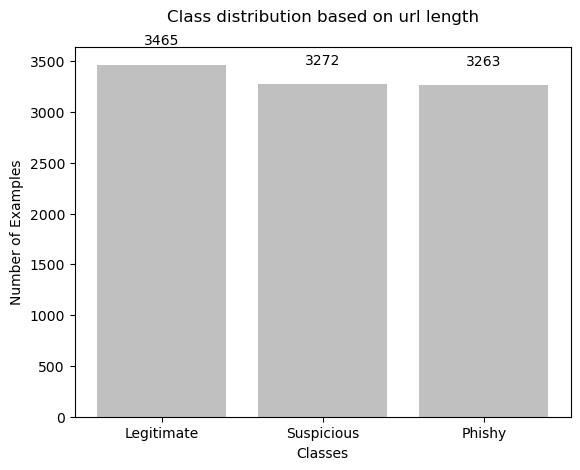

In [71]:
legitimate=0
suspicious=0
phishing = 0
for i in range(0, len(phishing_clean["url_length"])):
    if  phishing_clean["url_length"][i] < 54:
        legitimate = legitimate + 1
       
    elif  phishing_clean["url_length"][i] >= 54 and phishing_clean["url_length"][i] <= 75:
        suspicious = suspicious + 1
    else:
        phishing = phishing + 1

print(f"legitimate: {legitimate}, suspicious: {suspicious} and phishing: {phishing}")

x = ['Legitimate', 'Suspicious', 'Phishy']
x_pos = [i for i, _ in enumerate(x)]

y = [legitimate, suspicious, phishing]

fig, ax = plt.subplots()
rects2 = ax.bar(x_pos, y, color='silver')

plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.title("Class distribution based on url length\n")
plt.xticks(x_pos, x)

autolabel(rects2)
plt.show()

Total legitimate website: 9997 and total suspicious website: 3


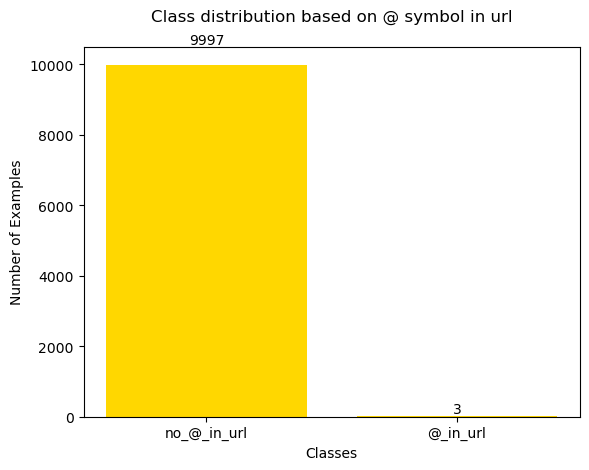

In [70]:
no_at_in_url= len(phishing_clean[phishing_clean['at_symbol'] == 0])
at_in_url = len(phishing_clean[phishing_clean['at_symbol'] == 1])
print(f"Total legitimate website: {no_at_in_url} and total suspicious website: {at_in_url}")

x = ['no_@_in_url', '@_in_url']
x_pos = [i for i, _ in enumerate(x)]

y = [no_at_in_url, at_in_url]

fig, ax = plt.subplots()
rects3 = ax.bar(x_pos, y, color='gold')

plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.title("Class distribution based on @ symbol in url\n")
plt.xticks(x_pos, x)

autolabel(rects3)
plt.show()

Total legitimate website: 9991 and total suspicious website: 9


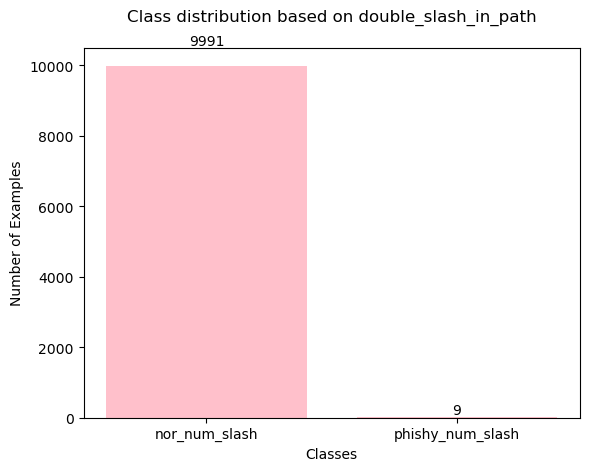

In [72]:
nor_num_slash= len(phishing_clean[phishing_clean['double_slash_in_path'] == 0])
num_slash = len(phishing_clean[phishing_clean['double_slash_in_path'] == 1])
print(f"Total legitimate website: {nor_num_slash} and total suspicious website: {num_slash}")

x = ['nor_num_slash', 'phishy_num_slash']
x_pos = [i for i, _ in enumerate(x)]

y = [nor_num_slash, num_slash]

fig, ax = plt.subplots()
rects4 = ax.bar(x_pos, y, color='pink')

plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.title("Class distribution based on double_slash_in_path\n")
plt.xticks(x_pos, x)

autolabel(rects4)
plt.show()

Total legitimate website: 5001 and total suspicious website: 2103


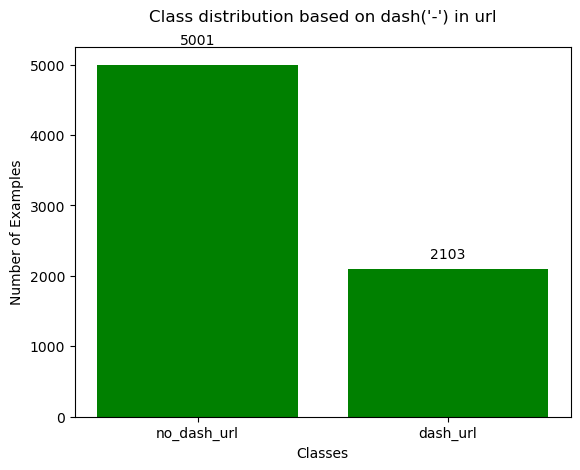

In [73]:
no_dash= len(phishing_clean[phishing_clean['num_dash'] == 0])
dash = len(phishing_clean[phishing_clean['num_dash'] == 1])
print(f"Total legitimate website: {no_dash} and total suspicious website: {dash}")

x = ['no_dash_url', 'dash_url']
x_pos = [i for i, _ in enumerate(x)]

y = [no_dash, dash]

fig, ax = plt.subplots()
rects5 = ax.bar(x_pos, y, color='green')

plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.title("Class distribution based on dash('-') in url\n")
plt.xticks(x_pos, x)

autolabel(rects5)
plt.show()

Total legitimate website: 1959, total suspicious website: 4053 and total suspicious website: 3988


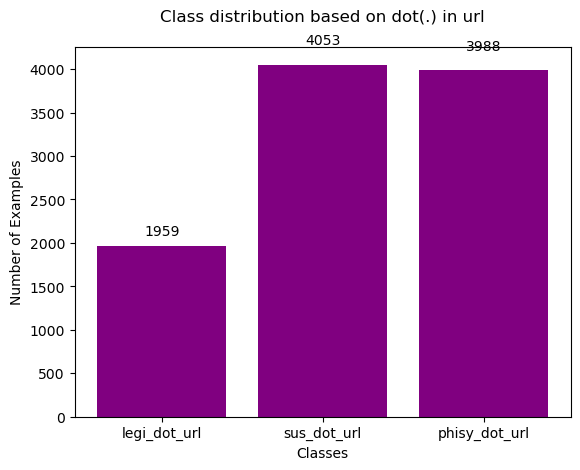

In [74]:
no_dot = len(phishing_clean[phishing_clean['num_dots'] == 1])
sus_dot = len(phishing_clean[phishing_clean['num_dots'] == 2])
phishy_dot = len(phishing_clean[phishing_clean['num_dots'] > 2])
print(f"Total legitimate website: {no_dot}, total suspicious website: {sus_dot} and total suspicious website: {phishy_dot}")

x = ['legi_dot_url', 'sus_dot_url', 'phisy_dot_url']
x_pos = [i for i, _ in enumerate(x)]

y = [no_dot, sus_dot, phishy_dot]

fig, ax = plt.subplots()
rects6 = ax.bar(x_pos, y, color='purple')

plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.title("Class distribution based on dot(.) in url\n")
plt.xticks(x_pos, x)

autolabel(rects6)
plt.show()

Total legitimate website: 8328 and total suspicious website: 1672


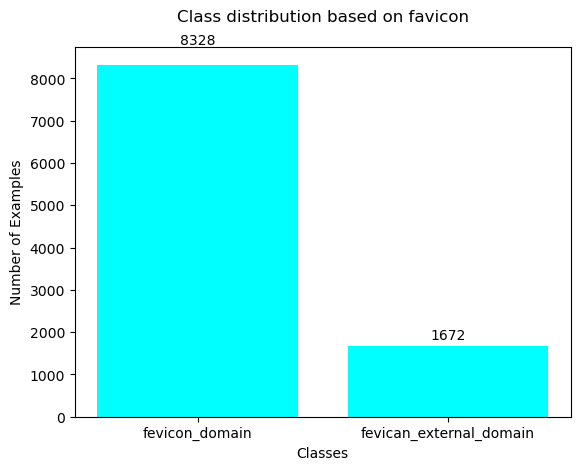

In [75]:
no_favicon= len(phishing_clean[phishing_clean['ext_favicon'] == 0])
favicon = len(phishing_clean[phishing_clean['ext_favicon'] == 1])
print(f"Total legitimate website: {no_favicon} and total suspicious website: {favicon}")

x = ['fevicon_domain', 'fevican_external_domain']
x_pos = [i for i, _ in enumerate(x)]

y = [no_favicon, favicon]

fig, ax = plt.subplots()
rects7 = ax.bar(x_pos, y, color='cyan')

plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.title("Class distribution based on favicon\n")
plt.xticks(x_pos, x)

autolabel(rects7)
plt.show()

Total legitimate website: 9951 and total suspicious website: 49


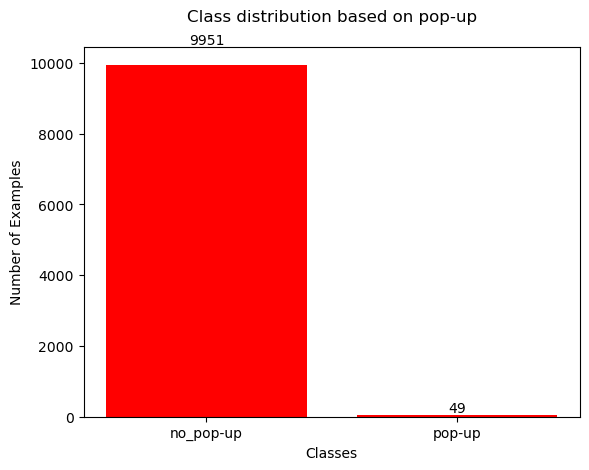

In [89]:
no_pop_up= len(phishing_clean[phishing_clean['pop_up_window'] == 0])
pop_up = len(phishing_clean[phishing_clean['pop_up_window'] == 1])
print(f"Total legitimate website: {no_pop_up} and total suspicious website: {pop_up}")

x = ['no_pop-up', 'pop-up']
x_pos = [i for i, _ in enumerate(x)]

y = [no_pop_up, pop_up]

fig, ax = plt.subplots()
rects8 = ax.bar(x_pos, y, color='red')

plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.title("Class distribution based on pop-up\n")
plt.xticks(x_pos, x)

autolabel(rects8)
plt.show()

All the chart univariate and they showing number of phishing website, number of ligimate website.
some chart showing number of suspicious website.